Initial Setup:

In [22]:
import pandas as pd

In [ ]:
import nltk

Read Data:

In [23]:
data_path1 = "../Data/raw/spam.csv"
df_1 = pd.read_csv(data_path1, encoding = "latin-1")

df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Cleaning Step 1.1:**

Change label encoding to:

0 - ham

1 - spam

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_1['label'] = encoder.fit_transform(df_1['label'])
df_1.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Data Cleaning Step 1.2:

Null values analysis

In [25]:
# missing values
df_1.isnull().sum()

label    0
text     0
dtype: int64

**Data Cleaning Step 1.3: **

Check for duplicates and remove them

In [26]:
# check for duplicate values and delete them
print("delete ", df_1.duplicated().sum(), "duplicates...")
df_1 = df_1.drop_duplicates(keep='first')
print("Remaining duplicates: ",df_1.duplicated().sum())

delete  415 duplicates...
Remaining duplicates:  0


**Data Cleaning Step 2.1: **

In [27]:
data_path2 = "../Data/raw/enron_spam_data.csv"
df_2 = pd.read_csv(data_path2, encoding = "latin-1")

df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [28]:
#Drop rows with null elements
df_2.dropna(inplace=True)
df_2.info()
df_2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33107 entries, 1 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33107 non-null  int64 
 1   Subject     33107 non-null  object
 2   Message     33107 non-null  object
 3   Spam/Ham    33107 non-null  object
 4   Date        33107 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


(33107, 5)

In [29]:
df_2.head()

,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14


In [30]:
 # drop last 2 cols
df_2.drop(columns=['Message ID','Date'],inplace=True)
df_2.sample(5)

,Subject,Message,Spam/Ham
9401,working paper list & etc,? ? ? dear vince :\n?\n? ? ? i have put togeth...,ham
25966,here is the money we owe you,"dear applicant , after further review upon rec...",spam
20727,"removes skin lines and produces younger , tigh...",it ' s another great way to make tangible impr...,spam
12129,bibi email,pb 996 @ yahoo . com,ham
9116,apr 20 - wharton - final agenda,"michael ,\nvince and i appreciate your keeping...",ham


In [31]:
# renaming the cols
df_2.rename(columns={'Subject':'sub','Message':'msg','Spam/Ham':'label'},inplace=True)
df_2.sample(5)

,sub,msg,label
16176,impotence treatment,"hello ,\ntry this revolutionary product , cial...",spam
6820,re : the garp 2001 convention : invitation to ...,"andreas ,\nthis looks ok . i look forward to r...",ham
7619,year end 2000 performance feedback,note : you will receive this message each time...,ham
29803,soft at incredibly low prices,looking for not expensive high - quality softw...,spam
28017,enterprise acquires acadian gas,news brief :\nenterprise acquires acadian natu...,ham


In [32]:
df_2['label'] = encoder.fit_transform(df_2['label'])
df_2.sample(5)

,sub,msg,label
30918,read,hello\nhope you are doing great and sound ? i ...,1
27837,bullets 7 / 21,interactive open season - two packages of tran...,0
26640,new love tabs shop .,visit our llcensed online dragstore for the be...,1
15833,new product ! cialis soft tabs .,hi !\nwe have a new product that we offer to y...,1
17090,united way - ena portland campaign,"hello all !\nas you are aware , houston is ask...",0


In [33]:
#search dubs
print("found ", df_2.duplicated().sum(), "dubs")
df_2 = df_2.drop_duplicates(keep='first')
print("dubs remain: ",df_2.duplicated().sum())

found  3071 dubs
dubs remain:  0


In [34]:
#merge sub + msg

df_2['text'] = df_2['sub'] + " " +  df_2['msg']
df_2.drop(columns=['msg','sub'],inplace=True)
df_2.sample(5)

,label,text
19341,1,"be a "" big "" men ! locative our zenextend pen ..."
16279,1,"re : loonger hello , do you want to spend iess..."
6127,0,re : cplex floating license chonawee and i jus...
31628,1,low - priced prescripiton medicine racetrack c...
28566,0,floor meeting with steve kean please join me f...


Merging the two datasets:

In [35]:
df = pd.concat([df_1, df_2])
df.shape

(35193, 2)

In [36]:
df.sample(5)

,label,text
2247,1,Hi ya babe x u 4goten bout me?' scammers getti...
13408,0,"ees examples louise ,\ni have reformatted the ..."
28425,0,tw parknride procedures attached is a draft of...
16863,0,re : john anderson done !\n- - - - - original ...
23938,0,treatment of hpl bank accounts fyi\nanne c . k...


In [37]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [38]:
df.to_csv("Data/Cleaned/merged_cleaned.csv", index=False)
df_1.to_csv('Data/Cleaned/spam_cleaned.csv', index=False)
df_2.to_csv('Data/Cleaned/enron_cleaned.csv', index=False)


finihed


# Data preprocessing:

The following function applies the following preprocessing steps to a text:

*   lowecase
*   tokenization (using nltk word tokenizer)
*   removing special characters and punctuation (actually all characters except numbers and letters)
*   removing stopwords (using nltk stopword list)
*   normalizing words using lematization (using nltk WordNetLemmatizer)

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    #retaining only numbers and alphabets
    y = []
    for i in text:
        if i.isalpha():
            y.append(i)

    #clone copy of list y
    text = y[:]
    y.clear()

    #stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    #leammtization
    for i in text:
        #y.append(ps.stem(i))
        y.append(lemmatizer.lemmatize(i))

    return " ".join(y)

NameError: name 'nltk' is not defined

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,label,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [42]:
df.drop(columns=['text'],inplace=True)
df.head()

,label,transformed_text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [43]:
df.rename(columns={'transformed_text':'text'},inplace=True)
df.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [44]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [45]:
df.to_csv("Data/merged_cleaned_preprocessed.csv", index=False)

#Feature Engineering

<AxesSubplot:xlabel='label', ylabel='count'>

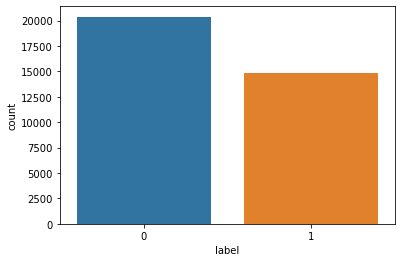

In [47]:
import seaborn as sns
sns.countplot(x=df["label"])

0..ham 1..spam